In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, label_binarize
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_curve, auc, mean_absolute_error,root_mean_squared_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
from sklearn import datasets
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

1.1. Otwarcie  pliku  z  danymi.

In [98]:
df = pd.read_csv('StudentPerformanceFactors.csv')

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


1.2. Sprawdzenie kompletności danych.

In [99]:
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


1.3. Sprawdzenie podstawowych statystyk.

In [100]:
print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores   
count    6607.000000  6607.000000   6607.00000      6607.000000  \
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [101]:
print(df.dtypes)

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


1.4. Wizualizacja: Heatmapa ze względu na liczbę brakujących danych. 

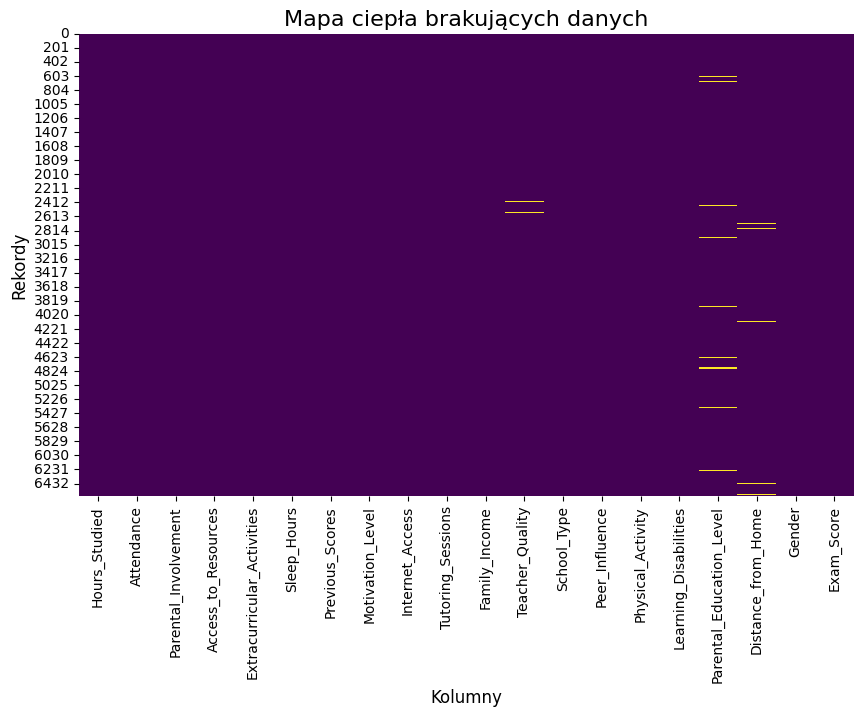

In [102]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title('Mapa ciepła brakujących danych', fontsize=16)
plt.xlabel('Kolumny', fontsize=12)
plt.ylabel('Rekordy', fontsize=12)

plt.show()


2. Przekształcenie danych.

2.1. Usuniecie niepotrzebnych kolumn.

In [103]:
df.drop(['Physical_Activity', 'Peer_Influence', 'Parental_Education_Level', 'Family_Income'], axis=1, inplace=True)

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Teacher_Quality,School_Type,Learning_Disabilities,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Medium,Public,No,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Public,No,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Public,No,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Public,No,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,High,Public,No,Near,Female,70


2.2. Mapowanie kolumn: Gender, Distance_from_Home, Access_to_Resources, Parental_Involvement, Motivation_Level, Teacher_Quality. 

Zamiana na wartosci liczbowe oraz uzupelnienie brakujących danych medianą gdzie trzeba.

In [104]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df['Distance_from_Home'] = df['Distance_from_Home'].map({'Near': 0, 'Moderate': 1, 'Far': 2})
median_distance = df['Distance_from_Home'].median()
df['Distance_from_Home'].fillna(median_distance, inplace=True)

df['Access_to_Resources'] = df['Access_to_Resources'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Parental_Involvement'] = df['Parental_Involvement'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Motivation_Level'] = df['Motivation_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

df['Teacher_Quality'] = df['Teacher_Quality'].map({'Low': 0, 'Medium': 1, 'High': 2})
median_distance = df['Teacher_Quality'].median()
df['Teacher_Quality'].fillna(median_distance, inplace=True)

2.3. Dummying kolumn ['Learning_Disabilities','Internet_Access', 'School_Type', 'Extracurricular_Activities'].

In [105]:
df = pd.get_dummies(df, columns=['Learning_Disabilities','Internet_Access', 'School_Type', 'Extracurricular_Activities'], drop_first=True)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Teacher_Quality,Distance_from_Home,Gender,Exam_Score,Learning_Disabilities_Yes,Internet_Access_Yes,School_Type_Public,Extracurricular_Activities_Yes
0,23,84,0,2,7,73,0,0,1.0,0.0,0,67,False,True,True,False
1,19,64,0,1,8,59,0,2,1.0,1.0,1,61,False,True,True,False
2,24,98,1,1,7,91,1,2,1.0,0.0,0,74,False,True,True,True
3,29,89,0,1,8,98,1,1,1.0,1.0,0,71,False,True,True,True
4,19,92,1,1,6,65,1,3,2.0,0.0,1,70,False,True,True,True


In [106]:
# Przekształcenie kolumny 'Exam_Score' i previous score na 1 dla wartosci wiekszej lub rownej 70%
df['Exam_Score'] = (df['Exam_Score'] > 69).astype(int)

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Teacher_Quality,Distance_from_Home,Gender,Exam_Score,Learning_Disabilities_Yes,Internet_Access_Yes,School_Type_Public,Extracurricular_Activities_Yes
0,23,84,0,2,7,73,0,0,1.0,0.0,0,0,False,True,True,False
1,19,64,0,1,8,59,0,2,1.0,1.0,1,0,False,True,True,False
2,24,98,1,1,7,91,1,2,1.0,0.0,0,1,False,True,True,True
3,29,89,0,1,8,98,1,1,1.0,1.0,0,1,False,True,True,True
4,19,92,1,1,6,65,1,3,2.0,0.0,1,1,False,True,True,True


In [107]:
# Funkcja do obliczania miar dla klasyfikacji
def calculate_classification_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [108]:
# Zresetowanie list do zapisu wyników poszczególnych modeli
models = ['Linear Regression', 'Logistic Regression', 'KNN', 'SVM']
accuracies = []
precisions = []
recalls = []
f1_scores = []

3. Podzielenie zestawu na train i test

In [109]:
y = df['Exam_Score']
X = df.drop(['Exam_Score'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

4. Modele - przewidywanie czy wynik egzaminu jest powyżej 70 puntów (1) czy poniżej (0)

4.1.0 Regresja liniowa domyślna

In [110]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 0.26020096884813143
Mean Squared Error: 0.09549293140351718
Root Mean Squared Error: 0.30901930587508153
R² Score: 0.4852982568454889


4.1.1 Regresja liniowa z optymalizacją - regularyzacja Ridge, Lasso i ElasticNet

In [111]:
# Ridge
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}
ridge_grid = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)

# Lasso Regression
lasso = Lasso(max_iter=10000)
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso, lasso_param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train, y_train)

# ElasticNet Regression
elastic_net = ElasticNet(max_iter=10000)
elastic_param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 1]  # l1_ratio = 1 to czyste Lasso, a bliżej 0 to czyste Ridge
}
elastic_grid = GridSearchCV(elastic_net, elastic_param_grid, scoring='neg_mean_squared_error', cv=5)
elastic_grid.fit(X_train, y_train)

# Najlepsze modele
best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_
best_elastic = elastic_grid.best_estimator_

# Predykcja i ocena dla Ridge
y_pred_optimized = best_ridge.predict(X_test)
mae_opt = mean_absolute_error(y_test, y_pred_optimized)
mse_opt = mean_squared_error(y_test, y_pred_optimized)
rmse_opt = np.sqrt(mse_opt)
r2_opt = r2_score(y_test, y_pred_optimized)

print("Najlepsze parametry dla Ridge Regression:", ridge_grid.best_params_)
print(f"Mean Absolute Error (optimized): {mae_opt}")
print(f"Mean Squared Error (optimized): {mse_opt}")
print(f"Root Mean Squared Error (optimized): {rmse_opt}")
print(f"R² Score (optimized): {r2_opt}")


# Predykcja i ocena dla Lasso
y_pred_lasso = best_lasso.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression - najlepsze parametry:", lasso_grid.best_params_)
print(f"Mean Absolute Error (Lasso): {mae_lasso}")
print(f"Mean Squared Error (Lasso): {mse_lasso}")
print(f"Root Mean Squared Error (Lasso): {rmse_lasso}")
print(f"R² Score (Lasso): {r2_lasso}")

# Predykcja i ocena dla ElasticNet
y_pred_elastic = best_elastic.predict(X_test)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("\nElasticNet - najlepsze parametry:", elastic_grid.best_params_)
print(f"Mean Absolute Error (ElasticNet): {mae_elastic}")
print(f"Mean Squared Error (ElasticNet): {mse_elastic}")
print(f"Root Mean Squared Error (ElasticNet): {rmse_elastic}")
print(f"R² Score (ElasticNet): {r2_elastic}")


Najlepsze parametry dla Ridge Regression: {'alpha': 10}
Mean Absolute Error (optimized): 0.26022625022828244
Mean Squared Error (optimized): 0.09550699478647341
Root Mean Squared Error (optimized): 0.30904205989876754
R² Score (optimized): 0.4852224559708499
Lasso Regression - najlepsze parametry: {'alpha': 0.01}
Mean Absolute Error (Lasso): 0.2629417117550651
Mean Squared Error (Lasso): 0.09846911772770106
Root Mean Squared Error (Lasso): 0.3137978931218326
R² Score (Lasso): 0.4692567732875379

ElasticNet - najlepsze parametry: {'alpha': 0.01, 'l1_ratio': 0.1}
Mean Absolute Error (ElasticNet): 0.2604392165785467
Mean Squared Error (ElasticNet): 0.09568973285143458
Root Mean Squared Error (ElasticNet): 0.3093375710311222
R² Score (ElasticNet): 0.4842375076695066


4.2.0 Regresja logistyczna domyślna

In [112]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
acc_logistic_original, prec_logistic_original, rec_logistic_original, f1_logistic_original = calculate_classification_metrics(y_test, y_pred_logistic)

conf_matrix = confusion_matrix(y_test, y_pred_logistic)
class_report = classification_report(y_test, y_pred_logistic)
accuracy = accuracy_score(y_test, y_pred_logistic)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print(f"Accuracy: {accuracy}")

Confusion Matrix:
 [[1455   40]
 [  76  412]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1495
           1       0.91      0.84      0.88       488

    accuracy                           0.94      1983
   macro avg       0.93      0.91      0.92      1983
weighted avg       0.94      0.94      0.94      1983

Accuracy: 0.9415027735753908


4.2.1 Regresja logistyczna z optymalizacją 

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Siatka parametrów do optymalizacji
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # regularyzacja L1 lub L2
    'solver': ['liblinear', 'saga']  # solvery obsługujące L1 i L2
}


logistic = LogisticRegression(max_iter=1000)
logistic_grid = GridSearchCV(logistic, param_grid, scoring='accuracy', cv=5)
logistic_grid.fit(X_train, y_train)


best_logistic = logistic_grid.best_estimator_

# Predykcja i ocena modelu
y_pred_logistic_optimized = best_logistic.predict(X_test)
acc_logistic_opt = accuracy_score(y_test, y_pred_logistic_optimized)
conf_matrix_opt = confusion_matrix(y_test, y_pred_logistic_optimized)
class_report_opt = classification_report(y_test, y_pred_logistic_optimized)

print("Najlepsze parametry dla Logistic Regression:", logistic_grid.best_params_)
print("\nConfusion Matrix (optimized):\n", conf_matrix_opt)
print("\nClassification Report (optimized):\n", class_report_opt)
print(f"Accuracy (optimized): {acc_logistic_opt}")


c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Garland\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Najlepsze parametry dla Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Confusion Matrix (optimized):
 [[1454   41]
 [  77  411]]

Classification Report (optimized):
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1495
           1       0.91      0.84      0.87       488

    accuracy                           0.94      1983
   macro avg       0.93      0.91      0.92      1983
weighted avg       0.94      0.94      0.94      1983

Accuracy (optimized): 0.940494200706001


4.3.0 KNN

In [114]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
acc_knn_original, prec_knn_original, rec_knn_original, f1_knn_original = calculate_classification_metrics(y_test, y_pred_knn)

conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)

print("=== Wyniki Klasyfikacji KNN ===")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print(f"Accuracy: {accuracy:.2f}")

=== Wyniki Klasyfikacji KNN ===
Confusion Matrix:
 [[1392  103]
 [ 149  339]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      1495
           1       0.77      0.69      0.73       488

    accuracy                           0.87      1983
   macro avg       0.84      0.81      0.82      1983
weighted avg       0.87      0.87      0.87      1983

Accuracy: 0.87


4.3.1 KNN z optymalizacją

In [115]:
# Siatka parametrów do optymalizacji
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # liczba sąsiadów
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # metryki odległości
    'weights': ['uniform', 'distance']  # waga sąsiadów
}


knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid_knn, scoring='accuracy', cv=5)
knn_grid.fit(X_train, y_train)

best_knn = knn_grid.best_estimator_

# Predykcja i ocena modelu
y_pred_knn_optimized = best_knn.predict(X_test)
acc_knn_opt = accuracy_score(y_test, y_pred_knn_optimized)
conf_matrix_knn_opt = confusion_matrix(y_test, y_pred_knn_optimized)
class_report_knn_opt = classification_report(y_test, y_pred_knn_optimized)

print("Najlepsze parametry dla KNN:", knn_grid.best_params_)
print("\nConfusion Matrix (optimized):\n", conf_matrix_knn_opt)
print("\nClassification Report (optimized):\n", class_report_knn_opt)
print(f"Accuracy (optimized): {acc_knn_opt:.2f}")


Najlepsze parametry dla KNN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

Confusion Matrix (optimized):
 [[1409   86]
 [ 146  342]]

Classification Report (optimized):
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      1495
           1       0.80      0.70      0.75       488

    accuracy                           0.88      1983
   macro avg       0.85      0.82      0.84      1983
weighted avg       0.88      0.88      0.88      1983

Accuracy (optimized): 0.88


4.4.0 SVM

In [116]:
model_svc = svm.SVC()
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
acc_svm_original, prec_svm_original, rec_svm_original, f1_svm_original = calculate_classification_metrics(y_test, y_pred_svc)

conf_matrix = confusion_matrix(y_test, y_pred_svc)
class_report = classification_report(y_test, y_pred_svc)
accuracy = accuracy_score(y_test, y_pred_svc)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print(f"Accuracy: {accuracy}")


Confusion Matrix:
 [[1417   78]
 [ 156  332]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      1495
           1       0.81      0.68      0.74       488

    accuracy                           0.88      1983
   macro avg       0.86      0.81      0.83      1983
weighted avg       0.88      0.88      0.88      1983

Accuracy: 0.8819969742813918


4.4.1 SVM z optymalizacją

In [117]:
# Siatka parametrów do optymalizacji
param_grid_svc = {
    'C': [0.1, 1, 10],  # Mniejszy zakres C
    'kernel': ['linear', 'rbf'],  # Tylko dwa jądra
    'gamma': ['scale', 'auto'],  # Zmniejszamy zakres gamma
    'shrinking': [True]  # Wybór jednej opcji shrinking
}


svc = SVC()
svc_grid = GridSearchCV(svc, param_grid_svc, scoring='accuracy', cv=5)
svc_grid.fit(X_train, y_train)


best_svc = svc_grid.best_estimator_

# Predykcja i ocena modelu
y_pred_svc_optimized = best_svc.predict(X_test)
acc_svc_opt = accuracy_score(y_test, y_pred_svc_optimized)
conf_matrix_svc_opt = confusion_matrix(y_test, y_pred_svc_optimized)
class_report_svc_opt = classification_report(y_test, y_pred_svc_optimized)

print("Najlepsze parametry dla SVC:", svc_grid.best_params_)
print("\nConfusion Matrix (optimized):\n", conf_matrix_svc_opt)
print("\nClassification Report (optimized):\n", class_report_svc_opt)
print(f"Accuracy (optimized): {acc_svc_opt:.2f}")


Najlepsze parametry dla SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}

Confusion Matrix (optimized):
 [[1453   42]
 [  78  410]]

Classification Report (optimized):
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1495
           1       0.91      0.84      0.87       488

    accuracy                           0.94      1983
   macro avg       0.93      0.91      0.92      1983
weighted avg       0.94      0.94      0.94      1983

Accuracy (optimized): 0.94


5. Normalizacja i Standaryzacja danych

In [118]:
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)


6. Użycie modeli regresji logistycznej, KNN i SVM na danych zestandaryzowanych i znormalizowanych

6.1 Regresja logistyczna

In [119]:
logistic_model = LogisticRegression(max_iter=1000)

# Trening i ocena modelu na danych zestandaryzowanych
logistic_model.fit(X_train_standard, y_train)
y_pred_standard = logistic_model.predict(X_test_standard)
accuracy_standard = accuracy_score(y_test, y_pred_standard)
class_report_standard = classification_report(y_test, y_pred_standard)
acc_logistic_standard, prec_logistic_standard, rec_logistic_standard, f1_logistic_standard = calculate_classification_metrics(y_test, y_pred_standard)

# Trening i ocena modelu na danych znormalizowanych
logistic_model.fit(X_train_minmax, y_train)
y_pred_minmax = logistic_model.predict(X_test_minmax)
accuracy_minmax = accuracy_score(y_test, y_pred_minmax)
class_report_minmax = classification_report(y_test, y_pred_minmax)
acc_logistic_minmax, prec_logistic_minmax, rec_logistic_minmax, f1_logistic_minmax = calculate_classification_metrics(y_test, y_pred_minmax)

# Wyniki porównania
print(f"Accuracy on Standardized Data: {accuracy_standard:.2f}")
print(f"Accuracy on Normalized Data: {accuracy_minmax:.2f}")
print("\nClassification Report (Standarized):\n", class_report_standard)
print("\nClassification Report (Normalized):\n", class_report_minmax)

Accuracy on Standardized Data: 0.94
Accuracy on Normalized Data: 0.94

Classification Report (Standarized):
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1495
           1       0.91      0.84      0.88       488

    accuracy                           0.94      1983
   macro avg       0.93      0.91      0.92      1983
weighted avg       0.94      0.94      0.94      1983


Classification Report (Normalized):
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1495
           1       0.93      0.82      0.87       488

    accuracy                           0.94      1983
   macro avg       0.93      0.90      0.91      1983
weighted avg       0.94      0.94      0.94      1983



6.2 Model KNN

In [120]:
knn_model = KNeighborsClassifier(n_neighbors=5)

# Trening i ocena modelu na danych zestandaryzowanych
knn_model.fit(X_train_standard, y_train)
y_pred_standard = knn_model.predict(X_test_standard)
accuracy_standard = accuracy_score(y_test, y_pred_standard)
class_report_standard = classification_report(y_test, y_pred_standard)
acc_knn_standard, prec_knn_standard, rec_knn_standard, f1_knn_standard = calculate_classification_metrics(y_test, y_pred_standard)

# Trening i ocena modelu na danych znormalizowanych
knn_model.fit(X_train_minmax, y_train)
y_pred_minmax = knn_model.predict(X_test_minmax)
accuracy_minmax = accuracy_score(y_test, y_pred_minmax)
class_report_minmax = classification_report(y_test, y_pred_minmax)
acc_knn_minmax, prec_knn_minmax, rec_knn_minmax, f1_knn_minmax = calculate_classification_metrics(y_test, y_pred_minmax)

# Wyniki porównania
print(f"Accuracy on Standardized Data: {accuracy_standard:.2f}")
print(f"Accuracy on Normalized Data: {accuracy_minmax:.2f}")
print("\nClassification Report (Standardized):\n", class_report_standard)
print("\nClassification Report (Normalized):\n", class_report_minmax)

Accuracy on Standardized Data: 0.86
Accuracy on Normalized Data: 0.84

Classification Report (Standardized):
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1495
           1       0.82      0.55      0.66       488

    accuracy                           0.86      1983
   macro avg       0.84      0.76      0.79      1983
weighted avg       0.86      0.86      0.85      1983


Classification Report (Normalized):
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1495
           1       0.77      0.47      0.58       488

    accuracy                           0.84      1983
   macro avg       0.81      0.71      0.74      1983
weighted avg       0.83      0.84      0.82      1983



6.3 Model SVM

In [121]:
svm_model = svm.SVC()

# Trening i ocena modelu na danych zestandaryzowanych
svm_model.fit(X_train_standard, y_train)
y_pred_standard = svm_model.predict(X_test_standard)
accuracy_standard = accuracy_score(y_test, y_pred_standard)
class_report_standard = classification_report(y_test, y_pred_standard)
acc_svm_standard, prec_svm_standard, rec_svm_standard, f1_svm_standard = calculate_classification_metrics(y_test, y_pred_standard)

# Trening i ocena modelu na danych znormalizowanych
svm_model.fit(X_train_minmax, y_train)
y_pred_minmax = svm_model.predict(X_test_minmax)
accuracy_minmax = accuracy_score(y_test, y_pred_minmax)
class_report_minmax = classification_report(y_test, y_pred_minmax)
acc_svm_minmax, prec_svm_minmax, rec_svm_minmax, f1_svm_minmax = calculate_classification_metrics(y_test, y_pred_minmax)

# Wyniki porównania
print(f"Accuracy on Standardized Data: {accuracy_standard:.2f}")
print(f"Accuracy on Normalized Data: {accuracy_minmax:.2f}")
print("\nClassification Report (Standardized):\n", class_report_standard)
print("\nClassification Report (Normalized):\n", class_report_minmax)


Accuracy on Standardized Data: 0.93
Accuracy on Normalized Data: 0.93

Classification Report (Standardized):
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      1495
           1       0.91      0.80      0.85       488

    accuracy                           0.93      1983
   macro avg       0.92      0.88      0.90      1983
weighted avg       0.93      0.93      0.93      1983


Classification Report (Normalized):
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1495
           1       0.91      0.78      0.84       488

    accuracy                           0.93      1983
   macro avg       0.92      0.88      0.90      1983
weighted avg       0.93      0.93      0.93      1983



7. Wykres

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


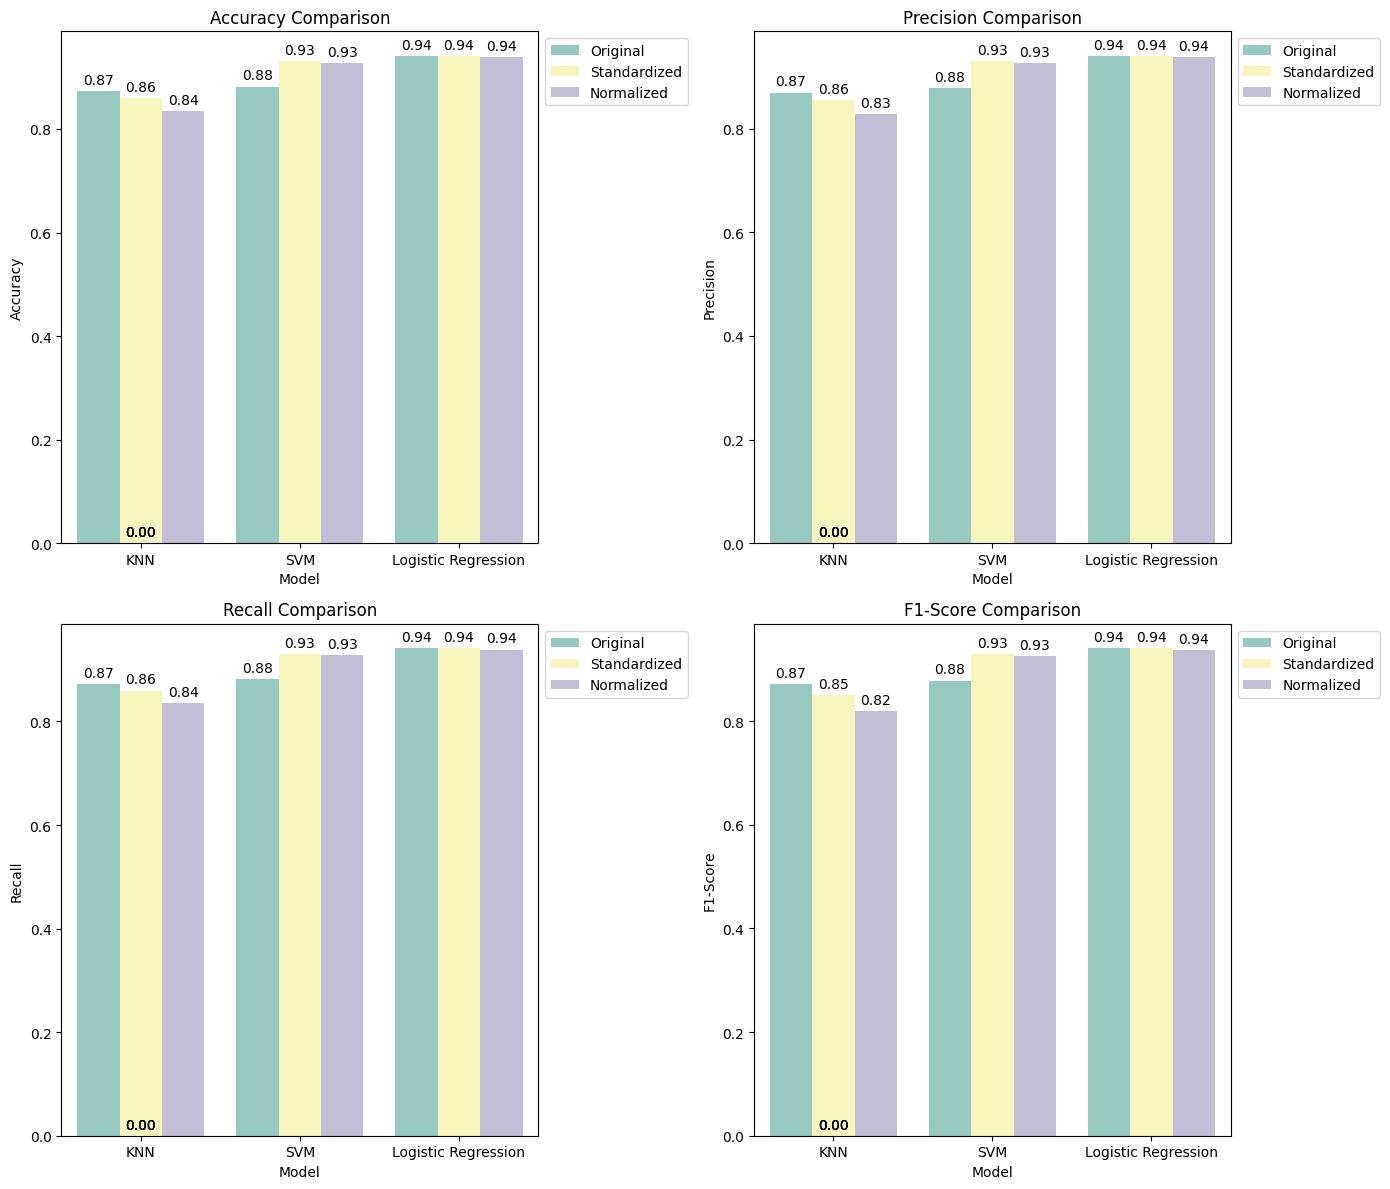

In [134]:
# Tworzymy DataFrame dla wyników wszystkich modeli
metrics_data = {
    'Model': ['KNN', 'KNN', 'KNN', 'SVM', 'SVM', 'SVM', 'Logistic Regression', 'Logistic Regression', 'Logistic Regression'],
    'Data Type': ['Original', 'Standardized', 'Normalized']*3,
    'Accuracy': [acc_knn_original, acc_knn_standard, acc_knn_minmax, 
                 acc_svm_original, acc_svm_standard, acc_svm_minmax,
                 acc_logistic_original, acc_logistic_standard, acc_logistic_minmax],
    'Precision': [prec_knn_original, prec_knn_standard, prec_knn_minmax,
                  prec_svm_original, prec_svm_standard, prec_svm_minmax,
                  prec_logistic_original, prec_logistic_standard, prec_logistic_minmax],
    'Recall': [rec_knn_original, rec_knn_standard, rec_knn_minmax,
               rec_svm_original, rec_svm_standard, rec_svm_minmax,
               rec_logistic_original, rec_logistic_standard, rec_logistic_minmax],
    'F1-Score': [f1_knn_original, f1_knn_standard, f1_knn_minmax,
                 f1_svm_original, f1_svm_standard, f1_svm_minmax,
                 f1_logistic_original, f1_logistic_standard, f1_logistic_minmax]
}

metrics_df = pd.DataFrame(metrics_data)

# Wykres Accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', hue='Data Type', data=metrics_df, palette='Set3')
plt.title('Accuracy Comparison')
plt.ylim(0, 1)  # Zwiększamy zakres osi Y do 1, aby wszystkie słupki były widoczne
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        xytext=(0, 8), textcoords='offset points', ha='center', va='center')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Wykres Precision
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Precision', hue='Data Type', data=metrics_df, palette='Set3')
plt.title('Precision Comparison')
plt.ylim(0, 1)  # Zwiększamy zakres osi Y do 1, aby wszystkie słupki były widoczne
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        xytext=(0, 8), textcoords='offset points', ha='center', va='center')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Wykres Recall
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Recall', hue='Data Type', data=metrics_df, palette='Set3')
plt.title('Recall Comparison')
plt.ylim(0, 1)  # Zwiększamy zakres osi Y do 1, aby wszystkie słupki były widoczne
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        xytext=(0, 8), textcoords='offset points', ha='center', va='center')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Wykres F1-Score
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='F1-Score', hue='Data Type', data=metrics_df, palette='Set3')
plt.title('F1-Score Comparison')
plt.ylim(0, 1)  # Zwiększamy zakres osi Y do 1, aby wszystkie słupki były widoczne
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        xytext=(0, 8), textcoords='offset points', ha='center', va='center')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


